# CESM Control vs Forcing Runs

How appropriate is it to use the control run as a climatology

In [5]:
#import my functions
import sys
sys.path.append('../')

import utils._modelDefinitions as _model
import utils.overlapBins as overlapBins

In [6]:
import xarray
import matplotlib.pyplot as plt
import numpy
import scipy.stats

%matplotlib inline

In [7]:
# Here is the data
indecesXr = xarray.open_dataset('../results/cesmTradIndeces.nc')

indecesXr.experiment.values

array(['LME.002', 'LME.003', 'LME.008', 'LME.009', '0850cntl.001', '001',
       '002', '003', '004', '005', '006', '007', '008', '009', '010',
       '011', '012', '013'], dtype=object)

In [8]:
indecesXr

<xarray.Dataset>
Dimensions:          (experiment: 18, year: 1250)
Coordinates:
  * year             (year) int64 850 851 852 853 854 ... 2096 2097 2098 2099
  * experiment       (experiment) object 'LME.002' 'LME.003' ... '012' '013'
Data variables:
    dmi              (experiment, year) float64 ...
    eastIO           (experiment, year) float64 ...
    nino34NoDetrend  (experiment, year) float64 ...
    nino34           (experiment, year) float64 ...
    sam              (experiment, year) float64 ...
    nino4NoDetrend   (experiment, year) float64 ...
    nino4            (experiment, year) float64 ...
    eastIONoDetrend  (experiment, year) float64 ...
Attributes:
    nino34NoDetrend:  [ 7 15]
    nino4NoDetrend:   [ 7 15]
    eastIONoDetrend:  [ 7 12]
    dmi:              [ 7 12]
    nino34:           [ 7 15]
    nino4:            [ 7 15]
    eastIO:           [ 7 12]
    sam:              [10 15]
    lat1:             [10 15]
    lat2:             [10 15]
    precAnom:         [ 9 15]
    tsAnom:           [ 9 15]

In [9]:
indecesXr['sam'].values.flatten()

array([-1.05913781,  0.27259859,  0.24537125, ...,         nan,
               nan,         nan])

In [36]:
def chi2Index(indecesXr, bins):
    
    # This should calculate stds for all indeces
    stdXr = indecesXr.sel(experiment=_model.cesmCntl).std(dim='year')
    
    for iIndex in list(indecesXr.data_vars):
    
        print(iIndex)

        std=stdXr[iIndex]
        #bins=numpy.arange(-2*std, 2.1*std, 0.25*std)
        
        plt.figure()

        cntlHist = indecesXr[iIndex].sel(
            experiment=_model.cesmCntl, year=slice(850,1849)
                 ).plot.hist(bins=bins)
        plt.title('cntl')

        plt.show()

        plt.figure()

        meanHist = indecesXr[iIndex].sel(
            experiment=_model.cesmFullForcings, year=slice(850,1849)
                     ).plot.hist(bins=cntlHist[1])
        plt.title('fullForcing')
        plt.show()

        #print(cntlHist[0]/cntlHist[0].sum())
        #print(meanHist[0]/meanHist[0].sum())
        print(
            scipy.stats.chisquare(cntlHist[0]/cntlHist[0].sum(), meanHist[0]/meanHist[0].sum() )
        )
        

dmi


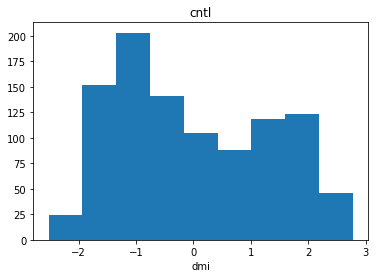

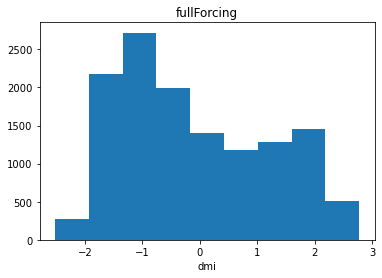

Power_divergenceResult(statistic=0.008994001246524524, pvalue=0.9999999999830208)
nino34


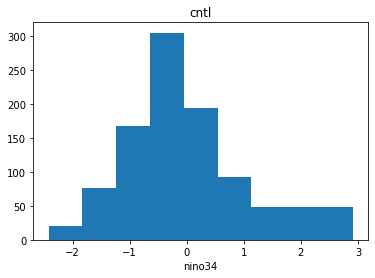

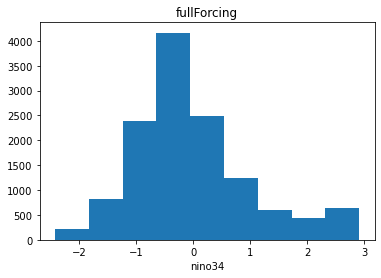

Power_divergenceResult(statistic=0.012099924623733244, pvalue=0.9999999999444482)
sam


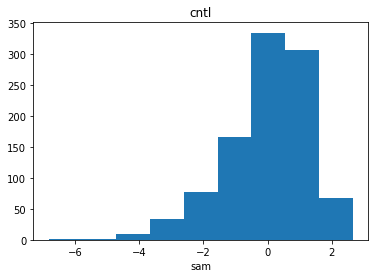

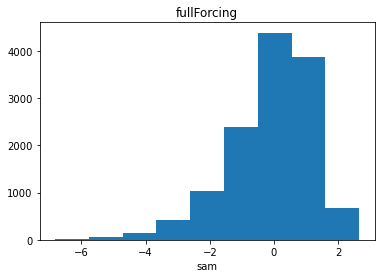

Power_divergenceResult(statistic=0.01073873149265044, pvalue=0.9999999999655161)


In [37]:
chi2Index(indecesXr[['dmi', 'nino34', 'sam']], 9 )

And for the compounds

In [38]:
#The data
firePos=xarray.open_dataset('../results/cesmFirePos.nc')
fireNeg=xarray.open_dataset('../results/cesmFireNeg.nc')

In [52]:
firePos.sum(dim='year')

<xarray.Dataset>
Dimensions:      (experiment: 18)
Coordinates:
  * experiment   (experiment) object 'LME.002' 'LME.003' ... '012' '013'
Data variables:
    dmi          (experiment) float64 98.0 119.0 83.0 86.0 ... 98.0 95.0 97.0
    nino34       (experiment) float64 21.0 23.0 15.0 25.0 ... 18.0 21.0 22.0
    sam          (experiment) float64 198.0 197.0 199.0 ... 186.0 175.0 200.0
    nEvents      (experiment) float64 766.0 758.0 765.0 ... 722.0 694.0 695.0
    all3         (experiment) float64 57.0 61.0 70.0 66.0 ... 74.0 57.0 52.0
    nino34+dmi   (experiment) float64 85.0 73.0 75.0 79.0 ... 48.0 61.0 57.0
    nino34+sam   (experiment) float64 26.0 21.0 31.0 22.0 ... 32.0 27.0 21.0
    dmi+sam      (experiment) float64 28.0 24.0 23.0 29.0 ... 19.0 28.0 32.0
    anyCompound  (experiment) float64 196.0 179.0 199.0 ... 173.0 173.0 162.0

In [58]:
def chi2Event(xr, x):

    firePosSum = xr.sel(year=slice(850,1850)).to_array().sum(dim=['year'])
    
    cntl=firePosSum.sel(variable=x).sel(
        experiment=_model.cesmCntl).values
    fullForcing=firePosSum.sel(variable=x).sel(
        experiment=_model.cesmFullForcings).sum(dim='experiment')/13

    plt.bar(x, cntl, 
            align='edge', width=-.3, label='cntl'
           )


    plt.bar(x, fullForcing, 
            align='edge', width=0.3, label='fullForcing'
           )

    plt.legend()

    print( scipy.stats.chisquare(cntl, f_exp=fullForcing ) )


Power_divergenceResult(statistic=17.447024605733624, pvalue=0.007773424802836717)


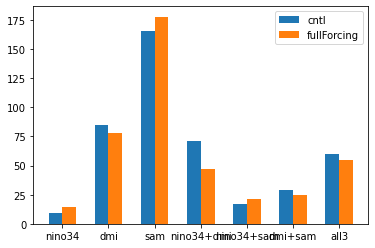

In [59]:
chi2Event(firePos, [*firePos.indeces, *firePos.pairs, 'all3'])

Power_divergenceResult(statistic=7.750816020208709, pvalue=0.25693350472441395)


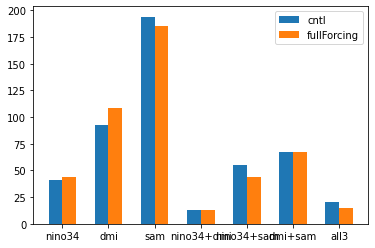

In [60]:
chi2Event(fireNeg, [*fireNeg.indeces, *fireNeg.pairs, 'all3'])

# In overlapping 30 year bins

In [53]:
overBinFirePos = overlapBins.binSum(firePos)
overBinFireNeg = overlapBins.binSum(fireNeg)

In [54]:
overBinFireNeg

<xarray.Dataset>
Dimensions:      (experiment: 18, year: 123)
Coordinates:
  * experiment   (experiment) object 'LME.002' 'LME.003' ... '012' '013'
  * year         (year) int64 865 875 885 895 905 ... 2045 2055 2065 2075 2085
Data variables:
    dmi          (year, experiment) float64 3.0 3.0 1.0 3.0 ... nan nan nan nan
    nino34       (year, experiment) float64 0.0 0.0 1.0 2.0 ... nan nan nan nan
    sam          (year, experiment) float64 1.0 6.0 7.0 9.0 ... nan nan nan nan
    nEvents      (year, experiment) float64 16.0 20.0 18.0 17.0 ... nan nan nan
    all3         (year, experiment) float64 0.0 1.0 1.0 1.0 ... nan nan nan nan
    nino34+dmi   (year, experiment) float64 1.0 0.0 0.0 0.0 ... nan nan nan nan
    nino34+sam   (year, experiment) float64 4.0 2.0 1.0 0.0 ... nan nan nan nan
    dmi+sam      (year, experiment) float64 1.0 2.0 2.0 0.0 ... nan nan nan nan
    anyCompound  (year, experiment) float64 6.0 5.0 4.0 1.0 ... nan nan nan nan
Attributes:
    all3:     ['nino34', 'dmi', 'sam']
    indeces:  ['nino34', 'dmi', 'sam']
    pairs:    ['nino34+dmi', 'nino34+sam', 'dmi+sam']
    Bins:     Overlapping 30 year bins, seperating by 10 year intervals
    Year:     Midpoint of bin

nino34


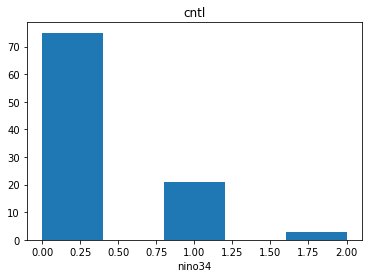

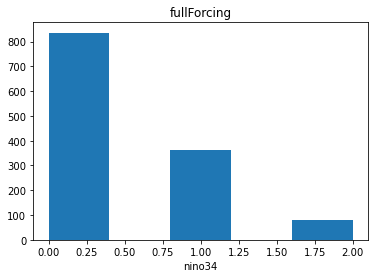

/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:6125: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp


Power_divergenceResult(statistic=nan, pvalue=nan)
dmi


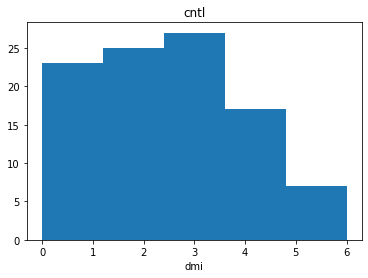

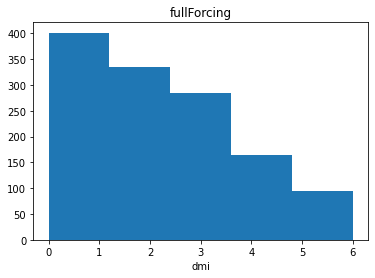

Power_divergenceResult(statistic=0.04741223765054672, pvalue=0.9997234115245275)
sam


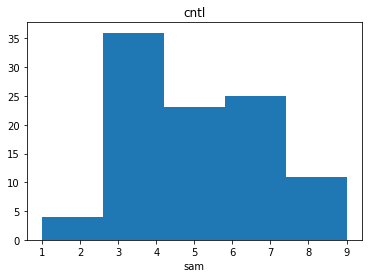

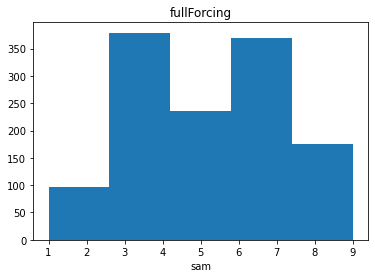

Power_divergenceResult(statistic=0.05164834151085539, pvalue=0.9996722414988638)


In [81]:
chi2Index(overBinFirePos[overBinFirePos.indeces], 5 )

nino34+dmi


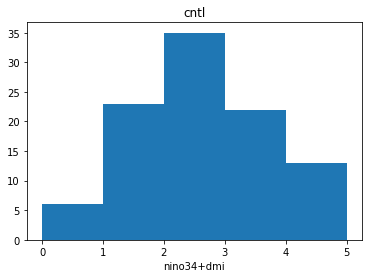

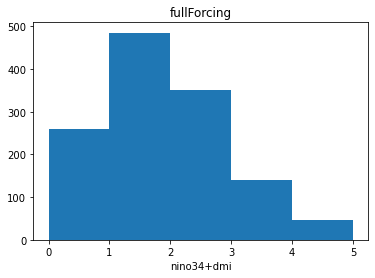

Power_divergenceResult(statistic=0.5389144291344963, pvalue=0.9696037505253794)


In [69]:
chi2Index(overBinFirePos['nino34+dmi'].to_dataset(), 5 )

nino34+sam


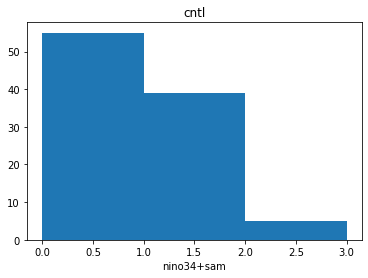

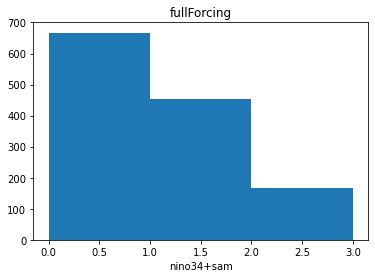

Power_divergenceResult(statistic=0.05609227673184791, pvalue=0.9723435034259286)


In [71]:
chi2Index(overBinFirePos['nino34+sam'].to_dataset(), 3 )

dmi+sam


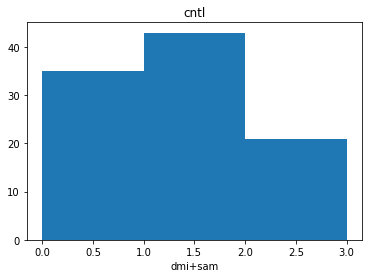

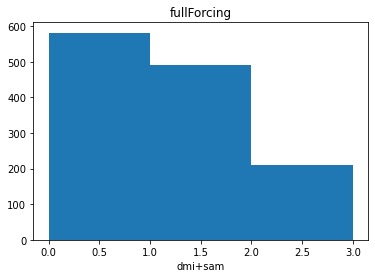

Power_divergenceResult(statistic=0.04370419247625927, pvalue=0.9783849311622729)


In [74]:
chi2Index(overBinFirePos['dmi+sam'].to_dataset(), 3 )